In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Step 2: Load the dataset
df = pd.read_csv('Churn_Modelling.csv')

# Optional: Drop unnecessary columns (CustomerId, Surname, etc.)
df.drop(['CustomerId', 'Surname'], axis=1, inplace=True)

In [3]:

# Step 3: Feature set and target set
X = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
y = df['Exited']  # Target variable

# Convert categorical data (Geography, Gender) to numeric using one-hot encoding
X = pd.get_dummies(X, columns=['Geography', 'Gender'], drop_first=True)

In [4]:
# Step 4: Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Step 5: Normalize the train and test data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Step 6: Initialize and build the neural network model
model = Sequential()

# Input layer
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))

# Hidden layers
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(units=16, activation='relu'))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\mugdh\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Step 7: Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7408 - loss: 0.5457 - val_accuracy: 0.8281 - val_loss: 0.4197
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8030 - loss: 0.4522 - val_accuracy: 0.8394 - val_loss: 0.3935
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8192 - loss: 0.4264 - val_accuracy: 0.8469 - val_loss: 0.3761
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8499 - loss: 0.3842 - val_accuracy: 0.8487 - val_loss: 0.3587
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8543 - loss: 0.3745 - val_accuracy: 0.8531 - val_loss: 0.3552
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8525 - loss: 0.3653 - val_accuracy: 0.8487 - val_loss: 0.3494
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8464 - loss: 0.3669 - val_accuracy: 0.8531 - val_loss: 0.3488
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8627 - loss: 0.3471 - val_accuracy: 0.

In [8]:
# Step 8: Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [9]:
# Step 9: Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 86.40%


In [10]:
# Step 10: Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1541   66]
 [ 206  187]]


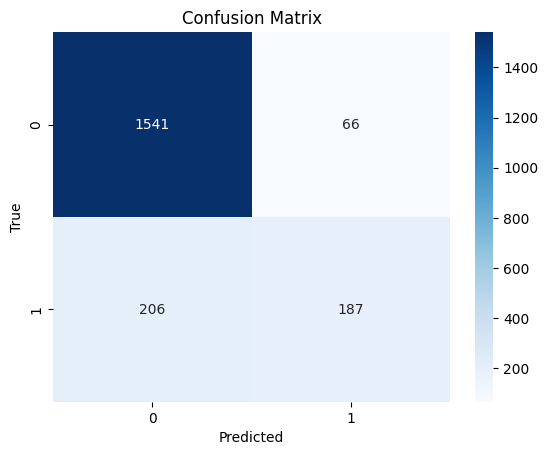

In [11]:
# Step 11: Visualize the confusion matrix (optional)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [12]:
# Step 12: Count customers predicted to leave
count_leave = np.sum(y_pred)
print(f"Count of customers predicted to leave the bank: {count_leave}")

Count of customers predicted to leave the bank: 253
